**Data Exploration**

loading image files...
number of cars:  8792
number of non-cars:  8968
image shape:  (64, 64, 3)
data type:  float32


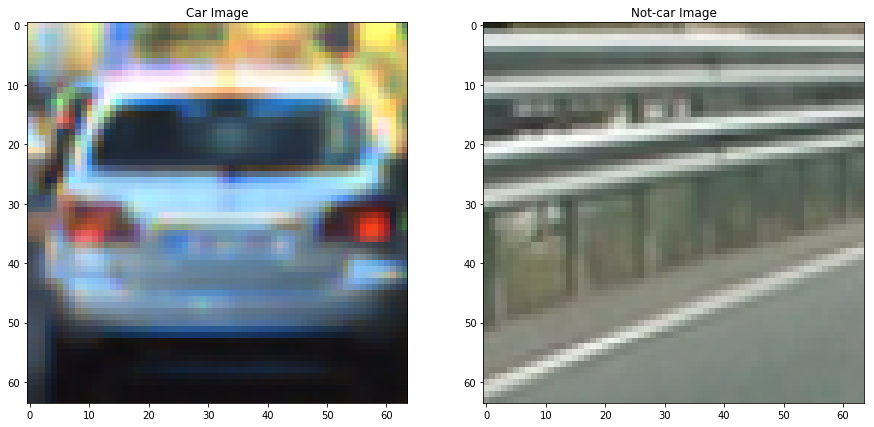

In [932]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split


%matplotlib inline
#from skimage import color, exposure
# images are divided up into vehicles and non-vehicles

print('loading image files...')
cars = glob.glob('./vehicles/*/*.png', recursive = True)
notcars = glob.glob('./non-vehicles/*/*.png', recursive = True)

# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    test_image = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = test_image.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = test_image.dtype
    # Return data_dict
    return data_dict

data_info = data_look(cars, notcars)

print('number of cars: ', data_info["n_cars"])
print('number of non-cars: ', data_info["n_notcars"]) 
print('image shape: ', data_info["image_shape"])
print('data type: ', data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Plot the examples
fig = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(car_image)
plt.title('Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Not-car Image')
plt.show()

**View HOG features**

In [260]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  #block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       #block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

features shape:  (7, 7, 2, 2, 9)
hog image shape:  (64, 64)


Text(0.5,1,'Non-Car HOG Visualization')

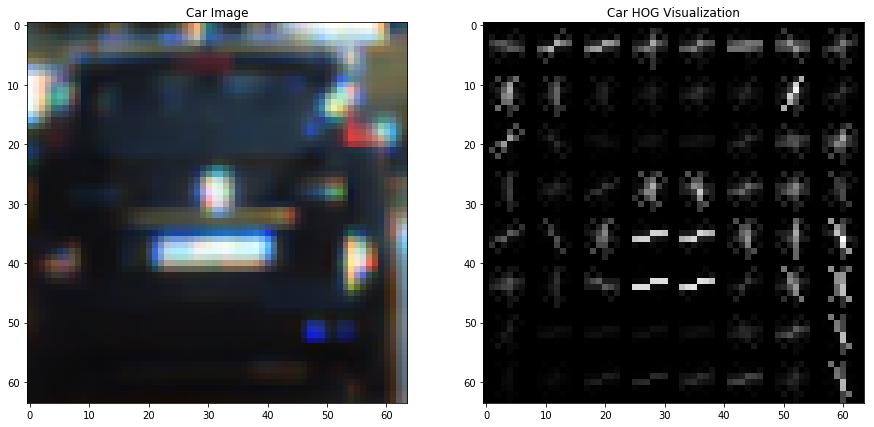

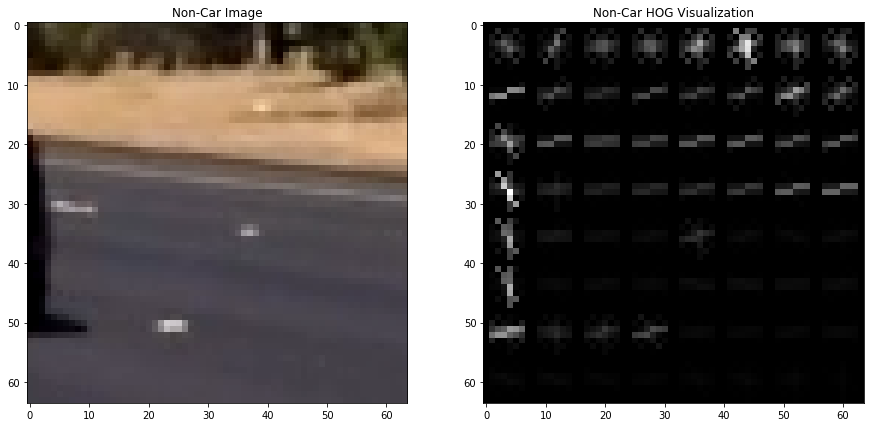

In [933]:
# Generate a random index to look at a car image
ind_car = np.random.randint(0, len(cars))
ind_notcar = np.random.randint(0,len(notcars))
# Read in the image
car_image = mpimg.imread(cars[ind_car])
car_gray = cv2.cvtColor(car_image, cv2.COLOR_RGB2GRAY)
notcar_image = mpimg.imread(notcars[ind_notcar])
notcar_gray = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features1, hog_image1 = get_hog_features(car_gray, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)

features2, hog_image2 = get_hog_features(notcar_gray, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis=True, feature_vec=False)
print('features shape: ', features1.shape)
print('hog image shape: ', hog_image1.shape)
# Plot the examples
fig = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(car_image, cmap='gray')
plt.title('Car Image')
plt.subplot(122)
plt.imshow(hog_image1, cmap='gray')
plt.title('Car HOG Visualization')
figure = plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(notcar_image, cmap='gray')
plt.title('Non-Car Image')
plt.subplot(122)
plt.imshow(hog_image2, cmap='gray')
plt.title('Non-Car HOG Visualization')

**Color Space**

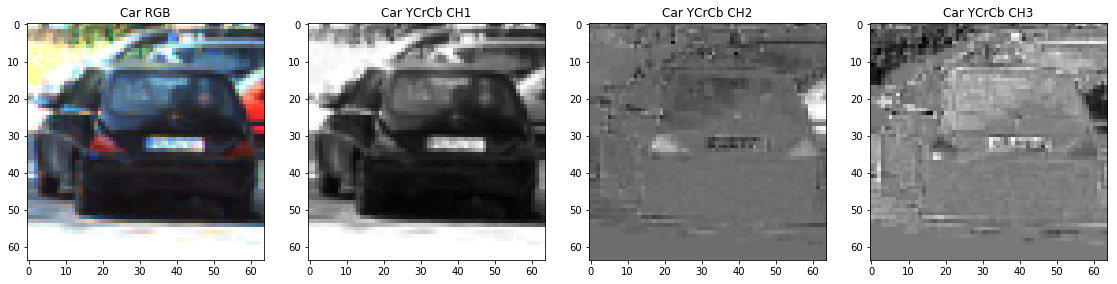

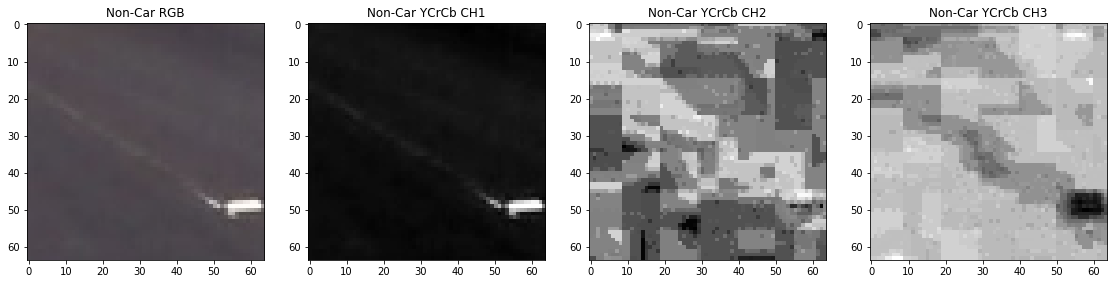

In [262]:
car_YCrCb = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
notcar_YCrCb = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)


def show_images(image0, image1, image2, image3, image0_exp="image0", image1_exp="Image1", image2_exp="Image2",
                image3_exp="image3", mode0 = None, mode1 = None, mode2 = None, mode3 = None):
    f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15, 15))
    f.tight_layout()
    ax0.imshow(image0,cmap = mode0)
    ax0.set_title(image0_exp, fontsize=12)
    ax1.imshow(image1,cmap = mode1)
    ax1.set_title(image1_exp, fontsize=12)
    ax2.imshow(image2,cmap = mode2)
    ax2.set_title(image2_exp, fontsize=12)
    ax3.imshow(image3,cmap = mode3)
    ax3.set_title(image3_exp, fontsize=12)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    

show_images(car_image, car_YCrCb[:,:,0], car_YCrCb[:,:,1], car_YCrCb[:,:,2], "Car RGB","Car YCrCb CH1",
           "Car YCrCb CH2", "Car YCrCb CH3", mode0='gray',mode1='gray', mode2='gray',mode3='gray')
show_images(notcar_image, notcar_YCrCb[:,:,0], notcar_YCrCb[:,:,1], notcar_YCrCb[:,:,2], "Non-Car RGB",
           "Non-Car YCrCb CH1", "Non-Car YCrCb CH2", "Non-Car YCrCb CH3", mode0='gray',mode1='gray',
            mode2='gray',mode3='gray')



In [263]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

In [264]:
# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

**Extract the features**

In [265]:
# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

**Train SVM Classifier**

In [266]:
# Setting the Hyper-parameters
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

In [267]:
t = time.time()

print("Extracting car features")
car_features = extract_features(cars, color_space=color_space,
                                spatial_size=spatial_size, hist_bins=hist_bins,
                                orient=orient, pix_per_cell=pix_per_cell,
                                cell_per_block=cell_per_block,
                                hog_channel=hog_channel, spatial_feat=spatial_feat,
                                hist_feat=hist_feat, hog_feat=hog_feat)
print("Extracting non-car features")
notcar_features = extract_features(notcars, color_space=color_space,
                                   spatial_size=spatial_size, hist_bins=hist_bins,
                                   orient=orient, pix_per_cell=pix_per_cell,
                                   cell_per_block=cell_per_block,
                                   hog_channel=hog_channel, spatial_feat=spatial_feat,
                                   hist_feat=hist_feat, hog_feat=hog_feat)

t2 = time.time()
print(round(t2 - t, 2), 'seconds to extract the features.')  


X = np.vstack((car_features, notcar_features)).astype(np.float64)
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)


print('Using spatial binning of:',spatial_size[0],'and', hist_bins,'histogram bins')
print('Using:', orient, 'orientations', pix_per_cell, 'pixels per cell and', cell_per_block, 'cells per block.')
print('Feature vector length:', len(X_train[0]))

Extracting car features
Extracting non-car features
82.2 seconds to extract the features.
Using spatial binning of: 32 and 32 histogram bins
Using: 9 orientations 8 pixels per cell and 2 cells per block.
Feature vector length: 8460


In [268]:
# Use a linear SVC
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
print("Training SVC Classifier...")
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

Training SVC Classifier...
6.38 Seconds to train SVC...


In [269]:
from sklearn.externals import joblib
import pickle

t=time.time()
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
t2 = time.time()
print(round(t2-t, 5), 'seconds to compute the test accuracy.')


Test Accuracy of SVC =  0.9916
0.02813 seconds to compute the test accuracy.


In [934]:

filename = "svm_model/svm.pkl"
joblib.dump(svc, filename)
pickle.dump(scaled_X,open("svm_model/scaled_X_data.pkl","wb"))
pickle.dump(y,open("svm_model/y_data.pkl","wb"))

print("Save the trained model.")

Save the trained model.


In [935]:
pickle.dump(X_scaler, open("svm_model/X_scaler.pkl","wb"))

In [936]:
data={
    'svc': svc,
    'X_scaler': X_scaler,
    'color_space': color_space,
    'orient': orient,
    'pix_per_cell': pix_per_cell,
    'cell_per_block': cell_per_block,
    'spatial_size' : spatial_size,
    'hist_bins': hist_bins,
    'hog_channel': hog_channel
     }

with open('svm_model/model-params.pk', 'wb') as pickleFile:
    pickle.dump(data, pickleFile)

**Sliding Window**

In [1032]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

**Draw Boxes**

In [1033]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

**Extract features from a single image window**

In [1034]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [1035]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

In [1036]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [350, None] # Min and max in y to search in slide_window()

In [1037]:
import pickle
from sklearn.externals import joblib
X_scaler = pickle.load(open("./svm_model/X_scaler.pkl", "rb"))
svc = joblib.load("./svm_model/svm.pkl")
print("Type of SVC: ", type(svc))
print("Type of X_scaler: ", type(X_scaler))

Type of SVC:  <class 'sklearn.svm.classes.LinearSVC'>
Type of X_scaler:  <class 'sklearn.preprocessing.data.StandardScaler'>


**Test some images**

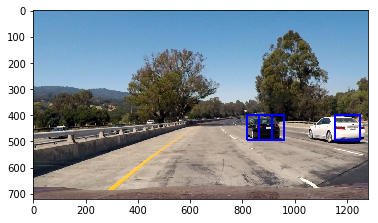

In [1051]:
image = mpimg.imread('test_images/test1.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)


In [1039]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)

In [1040]:
# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1
    nfeat_per_block = orient*cell_per_block**2
    
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    # nxsteps: number of times the window(64*64) needs to take along the x direction
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    onwindows = []
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                onwindows.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
                
    return draw_img, onwindows

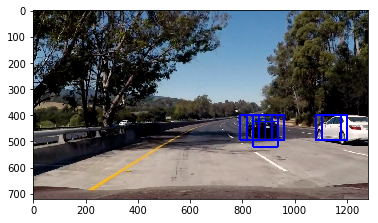

In [1041]:
img = mpimg.imread('test_images/test5.jpg')
ystart = 400
ystop = 656
scale = 1.5
    
out_img, allwindows = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.imshow(out_img)

**Remove Multiple Detections & False Positives by Heat Map**

In [1042]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

Text(0.5,1,'Heat Map')

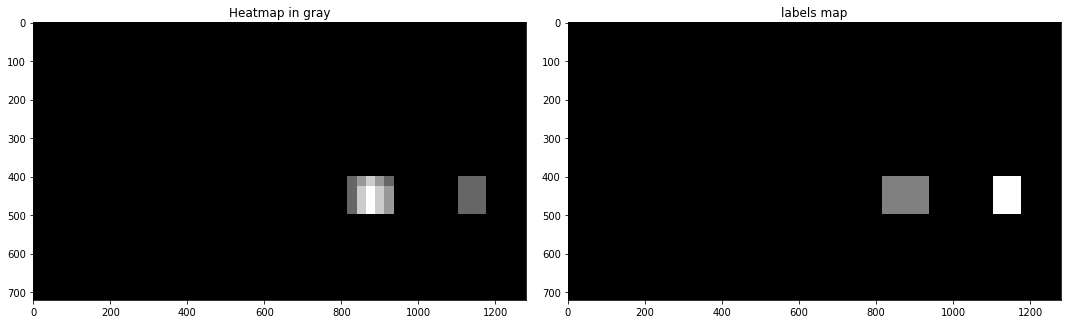

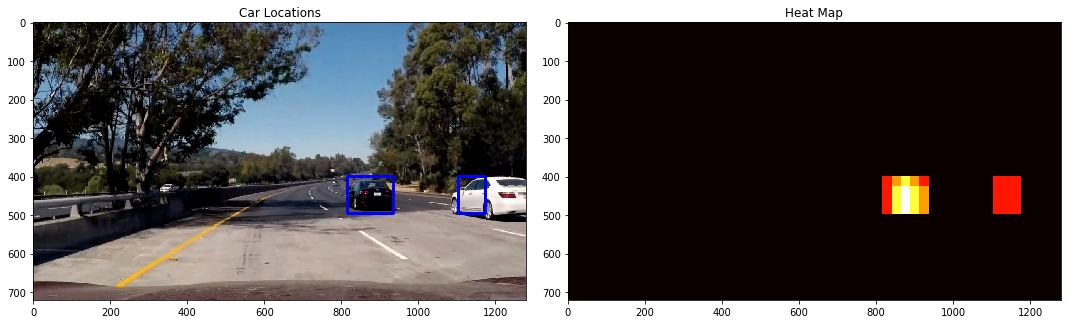

In [1043]:
from scipy.ndimage.measurements import label

heat = np.zeros_like(image[:,:,0]).astype(np.float)
box_list = allwindows

# Add heat to each box in box list
heat = add_heat(heat,box_list)

# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(img), labels)


f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout()
ax0.imshow(heatmap,cmap='gray')
ax0.set_title('Heatmap in gray', fontsize=12)
ax1.imshow(labels[0],cmap='gray')
ax1.set_title('labels map', fontsize=12)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout()
ax0.imshow(draw_img)
ax0.set_title('Car Locations', fontsize=12)
ax1.imshow(heatmap,cmap='hot')
ax1.set_title('Heat Map', fontsize=12)




**Video Process Pipeline**

In [1046]:
def detect_vehicles(image):
    out_img, allwindows = find_cars(image, ystart, 
                                     ystop, scale, svc, X_scaler, orient, 
                                     pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    box_list = allwindows

    # Add heat to each box in box list
    heat = add_heat(heat,box_list)
    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)

    
    return draw_img

Text(0.5,1,'Car Positions')

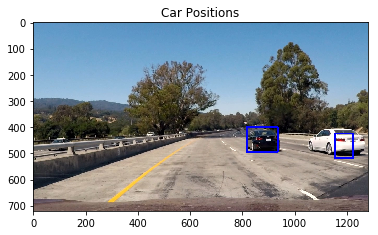

In [1047]:
img = mpimg.imread('test_images/test1.jpg')
output = detect_vehicles(img)
plt.figure()
plt.imshow(output)
plt.title('Car Positions')



In [1048]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [1049]:
test_video_output = "./test_video_output.mp4"
clip1 = VideoFileClip("./test_video.mp4")
white_clip1 = clip1.fl_image(detect_vehicles)
%time white_clip1.write_videofile(test_video_output, audio=False)

[MoviePy] >>>> Building video ./test_video_output.mp4
[MoviePy] Writing video ./test_video_output.mp4


 97%|█████████▋| 38/39 [00:12<00:00,  3.07it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test_video_output.mp4 

CPU times: user 11.8 s, sys: 504 ms, total: 12.3 s
Wall time: 12.9 s


In [116]:
project_video_output = "./project_video_output.mp4"
clip1 = VideoFileClip("./project_video.mp4")
white_clip1 = clip1.fl_image(detect_vehicles)
%time white_clip1.write_videofile(test_video_output, audio=False)

[MoviePy] >>>> Building video ./test_video_output.mp4
[MoviePy] Writing video ./test_video_output.mp4


100%|█████████▉| 1260/1261 [07:01<00:00,  2.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test_video_output.mp4 

CPU times: user 6min 47s, sys: 17.7 s, total: 7min 5s
Wall time: 7min 2s


**Pipeline with Smoothing and Multiscale Search**

In [695]:
from collections import deque

From the results above, we can see sometimes there are false positives and the window search is not stable as well. Nest step is to use smoothing and multiscale search to solve thess issue.

**test some scale set**

Text(0.5,1,'(ystart,ystop,scale)=(500, 700, 2.5)')

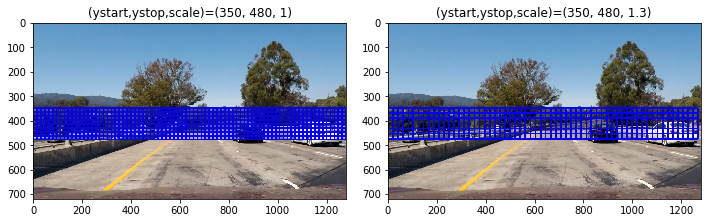

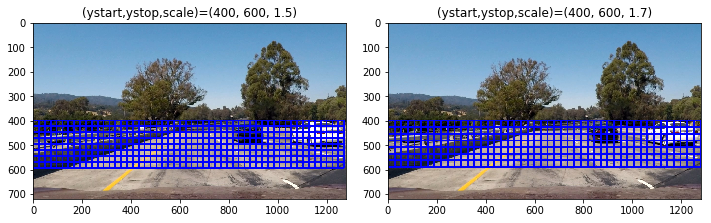

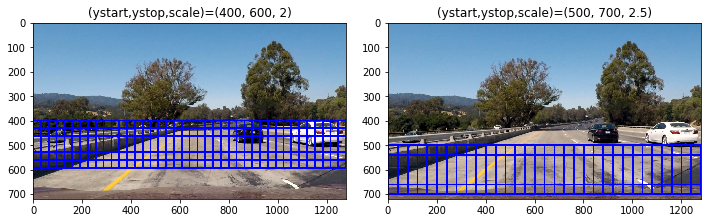

In [1006]:
img = mpimg.imread('test_images/test1.jpg')

# Define a single function that can extract features using hog sub-sampling and make predictions
def draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step +1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step +1
      
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
        
            #if test_prediction == 1:
            xbox_left = np.int(xleft*scale)
            ytop_draw = np.int(ytop*scale)
            win_draw = np.int(window*scale)
            cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                    
    return draw_img

ystart_ystop_scale = [(350, 480, 1), (350, 480, 1.3), (400, 600, 1.5),(400, 600, 1.7),(400, 600, 2),(500, 700, 2.5)]
   
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
(ystart, ystop, scale) = ystart_ystop_scale[0]
out_img0 = draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block)
ax0.imshow(out_img0)
ax0.set_title('{}={}'.format('(ystart,ystop,scale)', ystart_ystop_scale[0]))
(ystart, ystop, scale) = ystart_ystop_scale[1]
out_img1 = draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block)
ax1.imshow(out_img1)
ax1.set_title('{}={}'.format('(ystart,ystop,scale)', ystart_ystop_scale[1]))

f, (ax2, ax3) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
(ystart, ystop, scale) = ystart_ystop_scale[2]
out_img2 = draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block)
ax2.imshow(out_img2)
ax2.set_title('{}={}'.format('(ystart,ystop,scale)', ystart_ystop_scale[2]))
(ystart, ystop, scale) = ystart_ystop_scale[3]
out_img3 = draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block)
ax3.imshow(out_img3)
ax3.set_title('{}={}'.format('(ystart,ystop,scale)', ystart_ystop_scale[3]))

f, (ax4, ax5) = plt.subplots(1, 2, figsize=(10, 10))
f.tight_layout()
(ystart, ystop, scale) = ystart_ystop_scale[4]
out_img4 = draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block)
ax4.imshow(out_img4)
ax4.set_title('{}={}'.format('(ystart,ystop,scale)', ystart_ystop_scale[4]))
(ystart, ystop, scale) = ystart_ystop_scale[5]
out_img5 = draw_windows(img, ystart, ystop, scale, pix_per_cell, cell_per_block)
ax5.imshow(out_img5)
ax5.set_title('{}={}'.format('(ystart,ystop,scale)', ystart_ystop_scale[5]))
              


In [1019]:
class VehicleFinder:
    def __init__(self):
        
        self.color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
        self.orient = 9  # HOG orientations
        self.pix_per_cell = 8 # HOG pixels per cell
        self.cell_per_block = 2 # HOG cells per block
        self.hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
        self.spatial_size = (32, 32) # Spatial binning dimensions
        self.hist_bins = 32    # Number of histogram bins
        self.spatial_feat = True # Spatial features on or off
        self.hist_feat = True # Histogram features on or off
        self.hog_feat = True # HOG features on or off
        
        
        # Current HeatMap
        self.heatmap = None

        # Heat Image for the Last Three Frames
        self.heat_images = deque(maxlen=3)

        # Current Frame Count
        self.frame_count = 0
        self.full_frame_processing_interval = 10

        # Xstart
        self.xstart = 600

        # Various Scales
        self.ystart_ystop_scale = [(350, 480, 1), (350, 480, 1.3), (400, 600, 1.5),(400, 600, 1.7),(400, 600, 2),(500, 700, 2.5)]

        # Kernal For Dilation
        self.kernel = np.ones((50, 50))

        # Threshold for Heatmap
        self.threshold = 2
        
        
        self.X_scaler = pickle.load(open("./svm_model/X_scaler.pkl", "rb"))
        self.svc = joblib.load("./svm_model/svm.pkl")


    def find_cars_better(self, img):
        X_scaler = self.X_scaler
        orient = self.orient
        pix_per_cell = self.pix_per_cell
        cell_per_block = self.cell_per_block
        spatial_size = self.spatial_size
        hist_bins = self.hist_bins
        svc = self.svc

        box_list = []

        draw_img = np.copy(img)
        img = img.astype(np.float32) / 255

        if self.frame_count % self.full_frame_processing_interval == 0:
            mask = np.ones_like(img[:, :, 0])
        else:
            mask = np.sum(np.array(self.heat_images), axis=0)
            mask[(mask > 0)] = 1
            mask = cv2.dilate(mask, self.kernel, iterations=1)

        self.frame_count += 1

        for (ystart, ystop, scale) in self.ystart_ystop_scale:

            nonzero = mask.nonzero()
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])

            if len(nonzeroy) != 0:
                ystart = max(np.min(nonzeroy), ystart)
                ystop = min(np.max(nonzeroy), ystop)
            if len(nonzeroy) != 0:
                xstart = max(np.min(nonzerox), self.xstart)
                xstop = np.max(nonzerox)
            else:
                continue

            if xstop <= xstart or ystop <= ystart:
                continue

            img_tosearch = img[ystart:ystop, xstart:xstop, :]
            ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
            if scale != 1:
                imshape = ctrans_tosearch.shape
                ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1] / scale), np.int(imshape[0] / scale)))

            if ctrans_tosearch.shape[0] < 64 or ctrans_tosearch.shape[1] < 64:
                continue

            ch1 = ctrans_tosearch[:, :, 0]
            ch2 = ctrans_tosearch[:, :, 1]
            ch3 = ctrans_tosearch[:, :, 2]

            # Define blocks and steps as above
            nxblocks = (ch1.shape[1] // pix_per_cell) - 1
            nyblocks = (ch1.shape[0] // pix_per_cell) - 1
            nfeat_per_block = orient * cell_per_block ** 2
            # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
            window = 64
            nblocks_per_window = (window // pix_per_cell) - 1
            cells_per_step = 2  # Instead of overlap, define how many cells to step
            nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
            nysteps = (nyblocks - nblocks_per_window) // cells_per_step

            # Compute individual channel HOG features for the entire image
            hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
            hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
            hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)

            for xb in range(nxsteps + 1):
                for yb in range(nysteps + 1):
                    ypos = yb * cells_per_step
                    xpos = xb * cells_per_step

                    # Extract HOG for this patch
                    hog_feat1 = hog1[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
                    hog_feat2 = hog2[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
                    hog_feat3 = hog3[ypos:ypos + nblocks_per_window, xpos:xpos + nblocks_per_window].ravel()
                    hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

                    xleft = xpos * pix_per_cell
                    ytop = ypos * pix_per_cell

                    # Extract the image patch
                    subimg = ctrans_tosearch[ytop:ytop + window, xleft:xleft + window]

                    # Get color features
                    spatial_features = bin_spatial(subimg, size=spatial_size)
                    hist_features = color_hist(subimg, nbins=hist_bins)

                    # Scale features and make a prediction
                    test_features = X_scaler.transform(
                        np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))
                    # test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))
                    test_prediction = svc.predict(test_features)
                    if test_prediction == 1:
                        xbox_left = xstart + np.int(xleft * scale)
                        ytop_draw = np.int(ytop * scale)
                        win_draw = np.int(window * scale)
                        box_list.append(
                            ((xbox_left, ytop_draw + ystart), (xbox_left + win_draw, ytop_draw + win_draw + ystart)))

        # Add heat to each box in box list
        self.apply_heatmap_and_threshold(draw_img, box_list, self.threshold)

        # Find final boxes from heatmap using label function
        labels = label(self.heatmap)
        VehicleFinder.draw_labeled_bboxes_better(draw_img, labels)

        return draw_img
    
    
    def apply_heatmap_and_threshold(self, draw_img, bbox_list, threshold):
        heatmap = np.zeros_like(draw_img[:, :, 0]).astype(np.float)

        for box in bbox_list:
            # Add += 1 for all pixels inside each bbox
            # Assuming each "box" takes the form ((x1, y1), (x2, y2))
            heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

        self.heat_images.append(heatmap)
        self.heatmap = np.sum(np.array(self.heat_images), axis=0)
        self.heatmap[self.heatmap <= threshold] = 0

    #@staticmethod
    def draw_labeled_bboxes_better(img, labels):
        # Iterate through all detected cars
        for car_number in range(1, labels[1] + 1):
            # Find pixels with each car_number label value
            nonzero = (labels[0] == car_number).nonzero()
            # Identify x and y values of those pixels
            nonzeroy = np.array(nonzero[0])
            nonzerox = np.array(nonzero[1])
            # Define a bounding box based on min/max x and y
            bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
            # Draw the box on the image
            cv2.rectangle(img, bbox[0], bbox[1], (0, 0, 255), 6)

In [1020]:
vehicleFinder = VehicleFinder()
#vehicleDetector.ystart_ystop_scale = [(350, 480, 1), (400, 600, 1.5),(400, 600, 1.8), (400, 600, 2), (500, 700, 2.5)]
vehicleFinder.ystart_ystop_scale = [(350, 480, 1), (350, 480, 1.3), (400, 600, 1.5),(400, 600, 1.7),(400, 600, 2),(500, 700, 2.5)]

vehicleFinder.threshold = 3

Text(0.5,1,'Detect Cars')

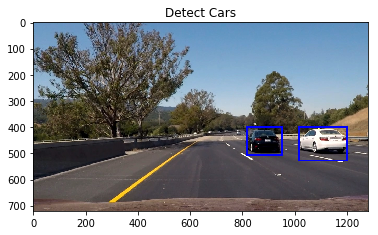

In [1009]:
img_test1 = mpimg.imread('test_images/test6.jpg')
output1 = vehicleFinder.find_cars_better(img_test1)


plt.figure()
plt.imshow(output1)
plt.title('Detect Cars')

Text(0.5,1,'Detect Car')

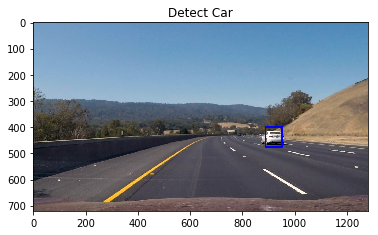

In [1012]:
img_test2 = mpimg.imread('test_images/test3.jpg')
output2 = vehicleFinder.find_cars_better(img_test2)
plt.figure()
plt.imshow(output2)
plt.title('Detect Car')


In [1018]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = './test_video_output_final.mp4'
clip3 = VideoFileClip("./test_video.mp4")
white_clip3 = clip3.fl_image(vehicleFinder.find_cars_better)
%time white_clip3.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video ./test_video_output_final.mp4
[MoviePy] Writing video ./test_video_output_final.mp4


 97%|█████████▋| 38/39 [00:16<00:00,  2.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test_video_output_final.mp4 

CPU times: user 15.1 s, sys: 1.03 s, total: 16.2 s
Wall time: 16.8 s


In [1021]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = './project_video_final.mp4'
clip4 = VideoFileClip("./result.mp4")
white_clip4 = clip4.fl_image(vehicleFinder.find_cars_better)
%time white_clip4.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video ./project_video_final.mp4
[MoviePy] Writing video ./project_video_final.mp4


100%|█████████▉| 1260/1261 [06:32<00:00,  2.88it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_final.mp4 

CPU times: user 6min 7s, sys: 25.2 s, total: 6min 32s
Wall time: 6min 33s
